# Supervised Learning - Linear Regression

# #Step 1: Getting and setting up the data.

In [44]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

*  Imports for plotting

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

* Import libraries for data visualization

In [46]:
from sklearn.datasets import load_boston

* import dataset from scikit learn as well as the linear_model module

In [47]:
# Load the housing dataset
boston = load_boston()

* download the data set

In [48]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

*  see what the data set contains with description

# # Step 2: Visualizing current data

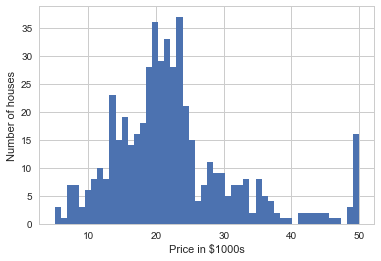

In [49]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

* make a histogram of the prices. take the prices as the target

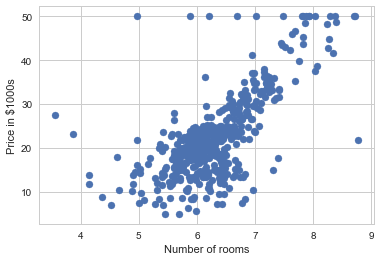

In [50]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

* make scatter plot of the housing price versus the number of rooms in the dwelling.

*** now we will use scikit learn to see if we can fit the data linearly

In [51]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


* Use pandas to transform the boston dataset into a DataFrame 

* head() method return the first 5 rows of the data  

In [52]:
# Set price column for target
boston_df['Price'] = boston.target

* create new column in data frame for the target (prices)

In [53]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* See the result (data frame after add price column)

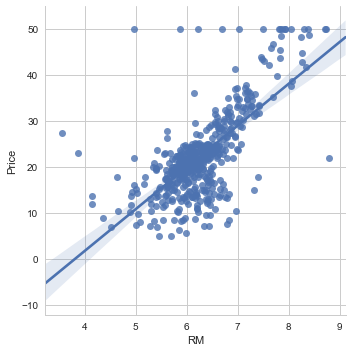

In [54]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

* Using seabron to create a linear fit

# # Step 3: The mathematics behind the Least Squares Method.

*** we'll use the least squares method as the way to estimate the coefficients

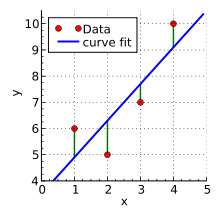

In [55]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

* Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

# #Step 4: Using Numpy for a Univariate Linear Regression

In [56]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price

* We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [57]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

* we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [58]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

* get the best fit values

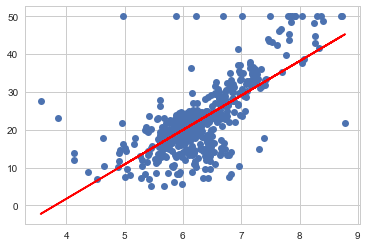

In [59]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

# #Step 5: Getting the error

In [60]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


* see how we can get the root mean squared error of the line we just fitted

# #Step 6: Using scikit learn to implement a multivariate regression


In [61]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression# Create a LinearRegression Object
lreg = LinearRegression()

* importing the linear regression library from the sklearn module

In [62]:
# Create a LinearRegression Object
lreg = LinearRegression()

* create a LinearRegression object

In [63]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

* We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [64]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* we're ready to pass the X and Y using the linear regression object.

In [65]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


* go ahead check the intercept and number of coefficients.

In [66]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [67]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


* set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

# #Step 7: Using Training and Validation

In [68]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

AttributeError: module 'sklearn' has no attribute 'cross_validation'

* The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size paramete

In [69]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

NameError: name 'X_train' is not defined

* output of the train_test_split

# #Step 8: Predicting Prices

In [70]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

* go ahead and try to use training and testing sets to predict house prices

In [71]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

NameError: name 'X_train' is not defined

* run a prediction on both the X training set and the testing set.

In [72]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

NameError: name 'Y_train' is not defined

* get the mean square error

# #Step 9 : Residual Plots

In [73]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

NameError: name 'pred_train' is not defined

* go ahead and create the residual plo

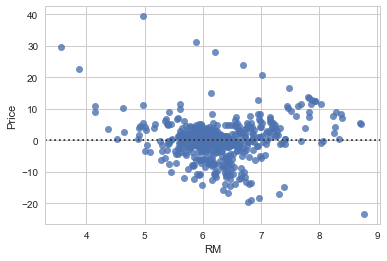

In [74]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)